<h1>regresion lineal</h1>

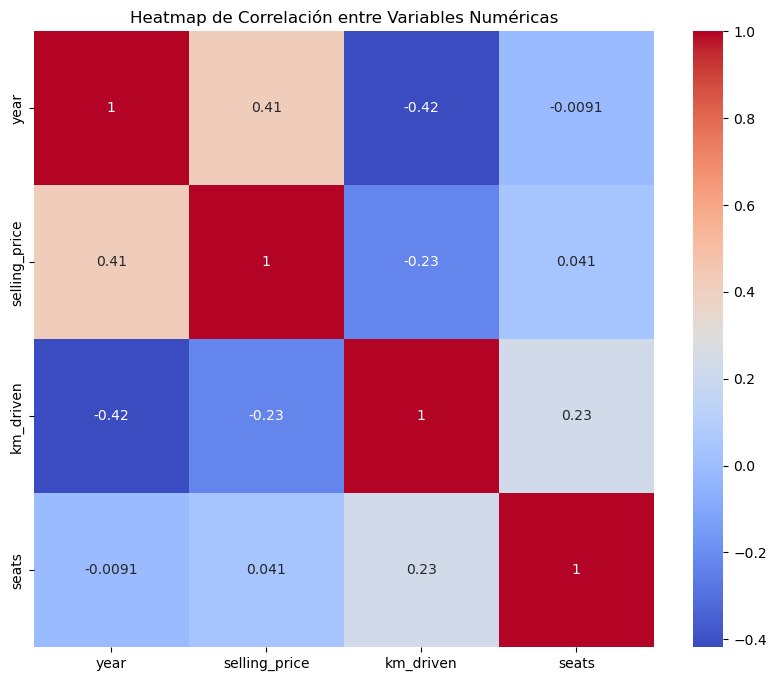

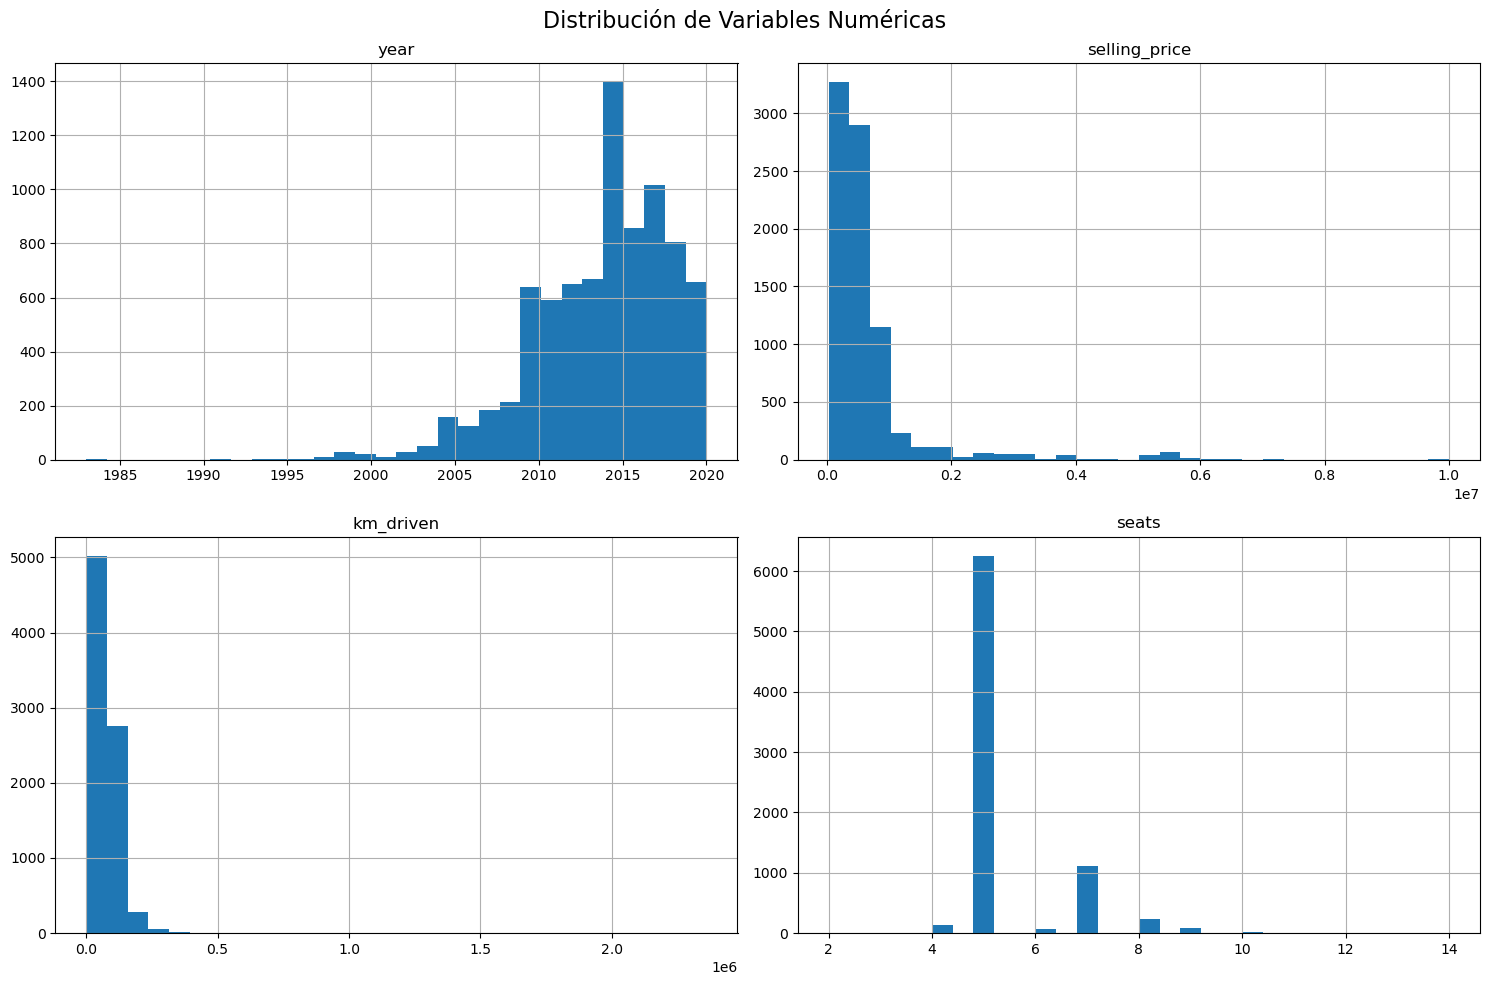

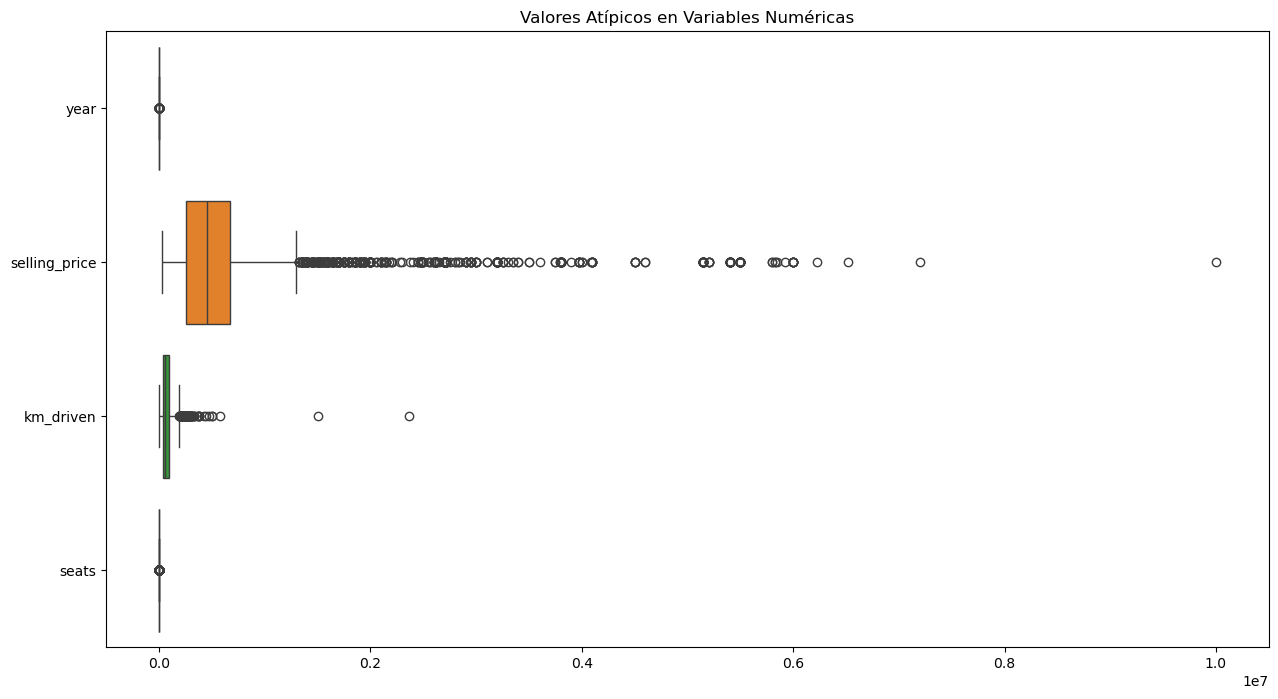

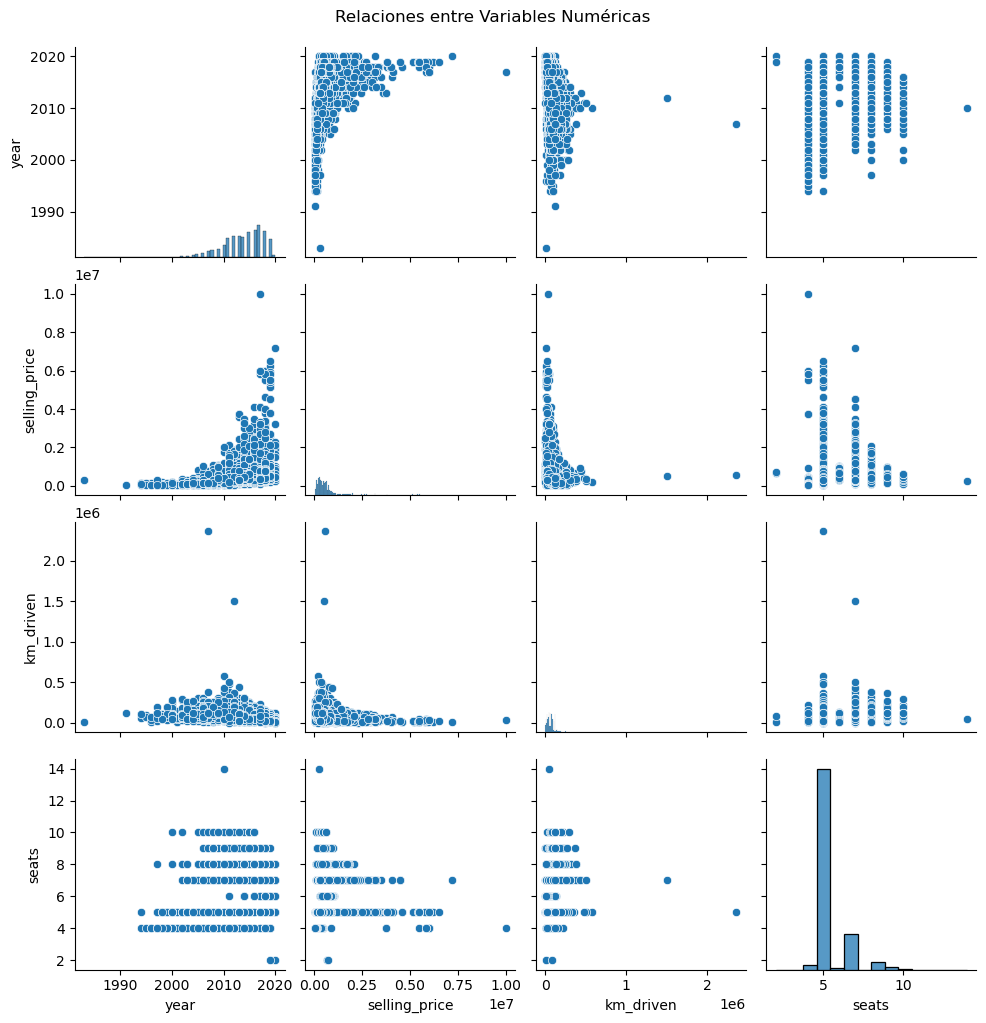

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
car_data = pd.read_csv('Documents/ANALISIS DE DATOS/Tarea 3 - Algoritmos de Aprendizaje Supervi/Anexo 2 - Dataset Vehicle/Car details v3.csv')

# Seleccionar sólo las columnas numéricas
numeric_data = car_data.select_dtypes(include=['float64', 'int64'])

# Visualizar correlaciones entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap de Correlación entre Variables Numéricas")
plt.show()

# Distribución de las variables numéricas
numeric_data.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()

# Análisis de valores atípicos usando Boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=numeric_data, orient='h')
plt.title("Valores Atípicos en Variables Numéricas")
plt.show()

# Relaciones entre variables numéricas con pairplot
sns.pairplot(numeric_data)
plt.suptitle("Relaciones entre Variables Numéricas", y=1.02)
plt.show()


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Cargar datos
car_data = pd.read_csv('Documents/ANALISIS DE DATOS/Tarea 3 - Algoritmos de Aprendizaje Supervi/Anexo 2 - Dataset Vehicle/Car details v3.csv')

# 1. Limpieza de datos: Verificar valores nulos
print("Valores nulos antes del tratamiento:")
print(car_data.isnull().sum())

# Tratamiento de valores nulos (decisión: llenar o eliminar según el caso)
car_data.dropna(inplace=True)

print("Valores nulos después del tratamiento:")
print(car_data.isnull().sum())

# 2. Tratamiento de valores atípicos (se identifican con los percentiles 1% y 99%)
numeric_columns = car_data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    q_low = car_data[col].quantile(0.01)
    q_high = car_data[col].quantile(0.99)
    car_data = car_data[(car_data[col] >= q_low) & (car_data[col] <= q_high)]

# 3. Codificación de variables categóricas
categorical_columns = car_data.select_dtypes(include=['object']).columns
car_data = pd.get_dummies(car_data, columns=categorical_columns, drop_first=True)

# 4. Normalización de variables numéricas (corrección)
scaler = StandardScaler()
car_data[numeric_columns] = scaler.fit_transform(car_data[numeric_columns])

# Verificar los datos procesados
print("Vista previa de los datos procesados:")
print(car_data.head())

Valores nulos antes del tratamiento:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64
Valores nulos después del tratamiento:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64
Vista previa de los datos procesados:
       year  selling_price  km_driven     seats  \
0 -0.031359      -0.240803   1.857082 -0.468668   
1 -0.031359      -0.365957   1.246402 -0.468668   
2 -2.351689      -0.697615   1.725367 -0.468668   
3 -1.191524      -0.592798   1.414040 -0.468668   
4 -2.061647      -0.741419   1.246402 -0.468668   

   name_Ambassador Grand 2000 DSZ

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression

# Variables dependientes e independientes
X = car_data.drop('selling_price', axis=1)  # Asegúrate de que 'selling_price' sea la columna objetivo
y = car_data['selling_price']

# Selección de características
selector = SelectKBest(score_func=f_regression, k=5)  # Selecciona las 5 características más relevantes
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]  # Obtiene los nombres de las columnas seleccionadas
X_selected = X[selected_features]  # Dataset reducido a las columnas seleccionadas

print("Características seleccionadas:")
print(selected_features)


Características seleccionadas:
Index(['transmission_Manual', 'mileage_22.37 kmpl', 'engine_2487 CC',
       'max_power_214.56 bhp', 'torque_202Nm@ 3600-5200rpm'],
      dtype='object')


In [17]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (5173, 5)
Tamaño del conjunto de prueba: (2217, 5)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo de Random Forest
model = RandomForestRegressor(random_state=42)

# Configuración de la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [10, 20, 30, None],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras necesarias para dividir un nodo
}

# Búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo después de la búsqueda
best_model = grid_search.best_estimator_

print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Precisión del mejor modelo en entrenamiento:", best_model.score(X_train, y_train))


Mejores hiperparámetros encontrados: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Precisión del mejor modelo en entrenamiento: 0.4839209104426966


In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluación del modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Desempeño del modelo en el conjunto de prueba:")
print("R^2 Score:", r2)
print("MAE (Error Absoluto Medio):", mae)
print("MSE (Error Cuadrático Medio):", mse)
print("RMSE (Raíz del Error Cuadrático Medio):", rmse)


Desempeño del modelo en el conjunto de prueba:
R^2 Score: 0.3928397480751501
MAE (Error Absoluto Medio): 0.46058103344953527
MSE (Error Cuadrático Medio): 0.5050952433082326
RMSE (Raíz del Error Cuadrático Medio): 0.7107005299760459


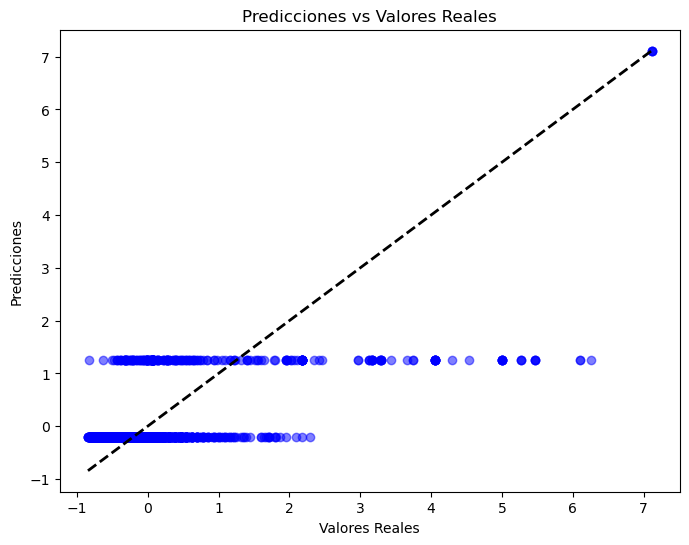

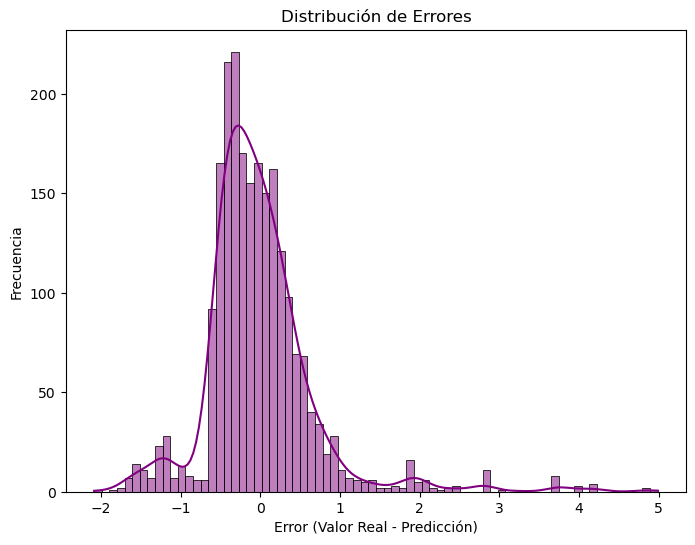

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()

# Histograma de errores
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, color='purple')
plt.xlabel("Error (Valor Real - Predicción)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores")
plt.show()
